In [1]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np
import os

In [2]:
!ls data

GEDI02_A_2019108185228_O01971_03_T00922_02_003_01_V002.csv
GEDI02_A_2019110123502_O01998_02_T04759_02_003_01_V002.csv
GEDI02_A_2019110184547_O02002_03_T01917_02_003_01_V002.csv
GEDI02_A_2019111175606_O02017_03_T00203_02_003_01_V002.csv
GEDI02_A_2019112122821_O02029_02_T04331_02_003_01_V002.csv
GEDI02_A_2019112170625_O02032_03_T04181_02_003_01_V002.csv
GEDI02_A_2019113113840_O02044_02_T01194_02_003_01_V002.csv
GEDI02_A_2019114104858_O02059_02_T02479_02_003_01_V002.csv
GEDI02_A_2019114165943_O02063_03_T00907_02_003_01_V002.csv
GEDI02_A_2019115161001_O02078_03_T03462_02_003_01_V002.csv
GEDI02_A_2019116104216_O02090_02_T00475_02_003_01_V002.csv
GEDI02_A_2019116152019_O02093_03_T00478_02_003_01_V002.csv
GEDI02_A_2019117095234_O02105_02_T01760_02_003_01_V002.csv
GEDI02_A_2019118151337_O02124_03_T04166_02_003_01_V002.csv
GEDI02_A_2019119094551_O02136_02_T01179_02_003_01_V002.csv
GEDI02_A_2019119142354_O02139_03_T05451_02_003_01_V002.csv
GEDI02_A_2019120085608_O02151_02_T02464_02_003_01_V002.c

In [3]:
# LOAD DATA FROM PREPROCESSED GRANULES
granules = os.listdir("data")
df = pd.concat([pd.read_csv("data/" + g) for g in granules if g.endswith(".csv")])
df

/var/folders/vc/j8pzs5pd2fb67td6jnyf9jjm0000gn/T/ipykernel_19674/3855549829.py:3: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([pd.read_csv("data/" + g) for g in granules if g.endswith(".csv")])


,Unnamed: 0,beam,channel,lat_lowestmode,lon_lowestmode,elev_lowestmode,delta_time,rh,land_cover_data/landsat_water_persistence,land_cover_data/landsat_treecover,land_cover_data/region_class,land_cover_data/urban_proportion,land_cover_data/urban_focal_window_size,shot_number
0,50540,2.0,1.0,44.598989,-75.648141,41.167305,6.694547e+07,[-4.12 -3.67 -3.37 -3.1 -2.88 -2.69 -2.54 -2....,100.0,0.0,7.0,0.0,3.0,6.657020e+16
1,50550,2.0,1.0,44.596357,-75.641979,45.790020,6.694547e+07,[-3.78 -3.1 -2.62 -2.28 -2.02 -1.76 -1.57 -1....,0.0,85.0,7.0,0.0,3.0,6.657020e+16
2,50560,2.0,1.0,44.593722,-75.635824,69.975044,6.694547e+07,[-4.42 -3.93 -3.55 -3.25 -3.03 -2.8 -2.65 -2....,0.0,0.0,7.0,10.0,3.0,6.657020e+16
3,50570,2.0,1.0,44.591090,-75.629666,73.796030,6.694547e+07,[-4.04 -3.33 -2.77 -2.39 -2.09 -1.91 -1.76 -1....,0.0,100.0,7.0,0.0,3.0,6.657020e+16
4,50580,2.0,1.0,44.588461,-75.623513,79.498150,6.694547e+07,[-3.78 -3.37 -3.1 -2.88 -2.69 -2.54 -2.43 -2....,0.0,0.0,7.0,0.0,3.0,6.657020e+16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
754,56110,11.0,5.0,42.972900,-73.297575,171.192580,8.828050e+07,[-3.85 -3.44 -3.14 -2.92 -2.73 -2.58 -2.43 -2....,0.0,0.0,7.0,0.0,3.0,1.048511e+17
755,56120,11.0,5.0,42.970044,-73.291767,168.693970,8.828050e+07,[-3.55 -3.22 -2.95 -2.73 -2.54 -2.39 -2.24 -2....,0.0,89.0,7.0,0.0,3.0,1.048511e+17
756,56130,11.0,5.0,42.967183,-73.285964,167.733610,8.828050e+07,[-3.78 -3.33 -3.03 -2.77 -2.58 -2.43 -2.32 -2....,0.0,0.0,7.0,0.0,3.0,1.048511e+17
757,56140,11.0,5.0,42.964321,-73.280167,184.724090,8.828050e+07,[-6.06 -4.98 -4.34 -3.85 -3.48 -3.18 -2.95 -2....,0.0,54.0,7.0,0.0,3.0,1.048511e+17


In [4]:
# PRODUCE RH METRIC ARRAY
def str2np(rhstr):
    return np.fromstring(rhstr[1:-1], sep=' ')
    
rh = np.array([str2np(r) for r in df["rh"]])
rh

array([[-4.12, -3.67, -3.37, ...,  2.65,  2.95,  3.59],
       [-3.78, -3.1 , -2.62, ..., 13.48, 13.93, 14.64],
       [-4.42, -3.93, -3.55, ...,  3.55,  4.19,  5.24],
       ...,
       [-3.78, -3.33, -3.03, ...,  2.5 ,  2.8 ,  3.4 ],
       [-6.06, -4.98, -4.34, ..., 14.08, 15.09, 16.14],
       [-4.79, -4.23, -3.85, ...,  4.49,  5.2 ,  6.4 ]])

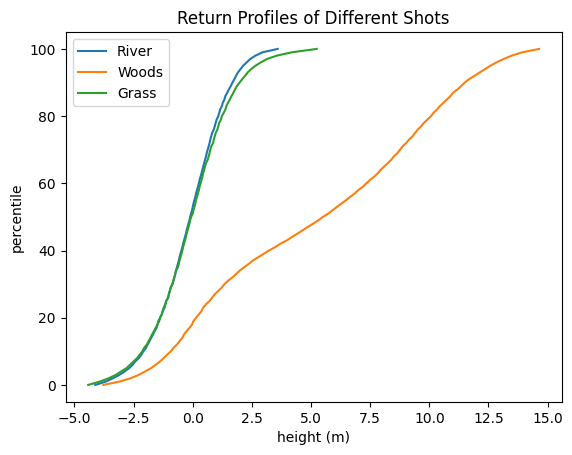

In [5]:
# VISUALIZE THE RETURN PROFILES OF THREE CONSECUTIVE SHOTS AS THE ISS ENTERS NYS
# FIRST SHOT IS ST LAWRENCE RIVER, THEN WOODS, THEN A NEIGHBORHOOD YARD
plt.plot(rh[0], range(101), label="River")
plt.plot(rh[1], range(101), label="Woods")
plt.plot(rh[2], range(101), label="Grass")
plt.legend(); plt.title("Return Profiles of Different Shots")
plt.xlabel("height (m)"); plt.ylabel("percentile"); plt.show()

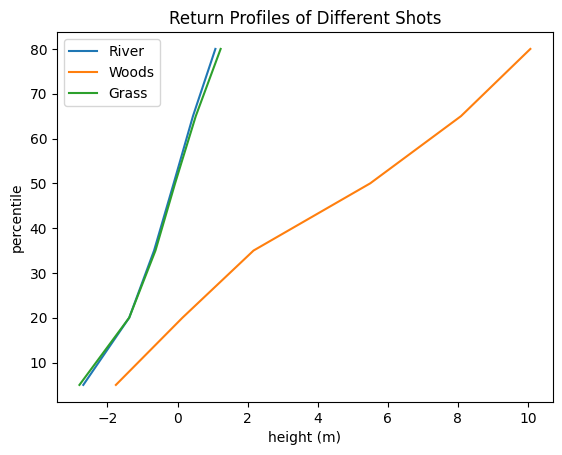

In [6]:
# NOTICE WE DISTINGUISH NEARLY AS WELL WITH ONLY A FEW PERCENTILES
# THIS IS A NATURAL DIMENSION-REDUCTION STRATEGY FOR THE RH DATA
idx = range(5, 95, 15)     # pick 7 equispaced percentiles
reduced = rh[:, idx]
plt.plot(reduced[0], idx, label="River")
plt.plot(reduced[1], idx, label="Woods")
plt.plot(reduced[2], idx, label="Grass")
plt.legend(); plt.title("Return Profiles of Different Shots")
plt.xlabel("height (m)"); plt.ylabel("percentile"); plt.show()

In [7]:
# CLUSTER THE REDUCED DATASET
kmeans = KMeans(n_clusters=2)
kmeans.fit(reduced)   # this may take a while
label = kmeans.labels_
label

array([1, 1, 1, ..., 1, 1, 1], dtype=int32)

In [8]:
df.keys()

Index(['Unnamed: 0', 'beam', 'channel', 'lat_lowestmode', 'lon_lowestmode',
       'elev_lowestmode', 'delta_time', 'rh',
       'land_cover_data/landsat_water_persistence',
       'land_cover_data/landsat_treecover', 'land_cover_data/region_class',
       'land_cover_data/urban_proportion',
       'land_cover_data/urban_focal_window_size', 'shot_number'],
      dtype='object')

In [9]:
# PRINT AVERAGES OF VARIOUS METRICS IN EACH CLUSTER
# NOTE THERE ARE SIGNIFICANT DIFFERENCES!
# WE SHOULD SCATTERPLOT THE SHOTS ACROSS NYS, COLORED BY CLUSTER TO SEE WHERE THEY FALL
for layer in [
    'land_cover_data/landsat_water_persistence',
    'land_cover_data/landsat_treecover',
    'land_cover_data/urban_proportion'
]:
    a0 = df[layer][label == 0].sum() / sum(label == 0)
    a1 = df[layer][label == 1].sum() / sum(label == 1)
    print(f"Average of {layer}: cluster 0 = {a0}, cluster 1 = {a1}")

Average of land_cover_data/landsat_water_persistence: cluster 0 = 0.17550712932186013, cluster 1 = 12.89713283622521
Average of land_cover_data/landsat_treecover: cluster 0 = 91.52537199838464, cluster 1 = 43.23761031665693
Average of land_cover_data/urban_proportion: cluster 0 = 0.567837283712839, cluster 1 = 3.0494803176549423
